## PROJETO DE PROCESSAMENTO DIGITAL DE IMAGENS

### Estudante: Marcelo de Souza Pena - RA: 11039314
### Professor: Francisco Zampirolli

Reconhecimento de caracteres utilizando processamento de imagens digitais e aprendizado de máquina com a biblioteca cv2.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def showfig(image, ucmap):
    imgplot=plt.imshow(image, ucmap)

(2496, 1967, 3)


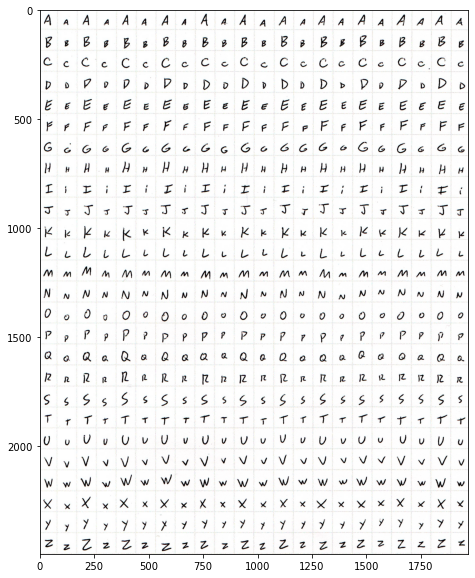

In [3]:
img = cv2.imread("caracteres.jpg")
print(img.shape)
plt.figure(figsize = (10,10))
showfig(img, "gray")

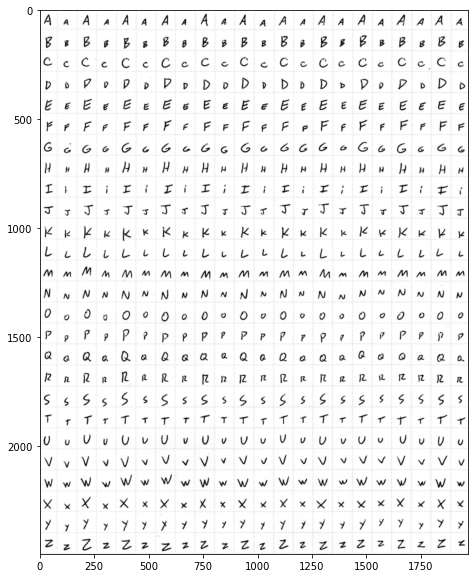

In [4]:
gray = cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(src = gray, ksize = (5,5), sigmaX = 0)
plt.figure(figsize = (10,10))
showfig(blur, "gray")

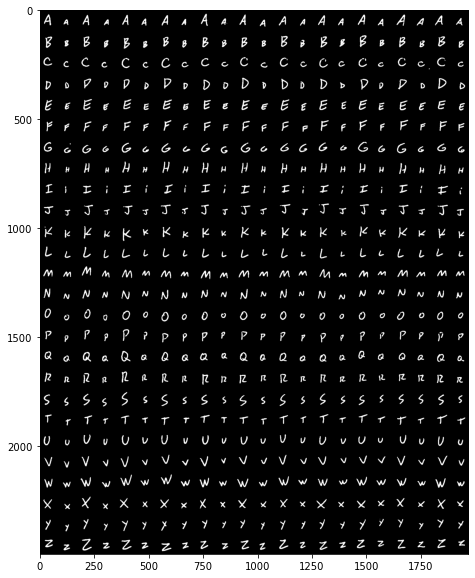

In [5]:
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th = 255 - th
plt.figure(figsize=(10,10))
showfig(th,"gray")

# As linhas de grade finalmente foram embora

In [6]:
print(th.shape)

(2496, 1967)


In [7]:
rsz_th = th[:,4:1962]
print(rsz_th.shape)
cells = [np.hsplit(row,22) for row in np.vsplit(rsz_th,26)]

(2496, 1958)


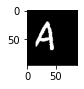

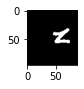

In [8]:
# visualizando algumas letras

x = np.array(cells)

plt.figure(figsize=(1,1))
showfig(x[0,0,:,:],"gray") # primeiro caractere
plt.figure(figsize=(1,1))
showfig(x[25,21,:,:],"gray") # último caractere

x shape =  (26, 22, 96, 89)
x_reshaped shape = (572, 96, 89)


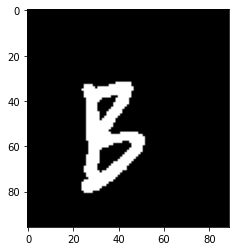

In [9]:
print("x shape = ", x.shape)
x_reshaped = x.reshape(572,96,89)
print("x_reshaped shape =", x_reshaped.shape)
showfig(x_reshaped[26,:,:],"gray")

In [10]:
keys_caps = [i for i in range(65,91)]
keys_lower = [i for i in range(97,123)]

keys = keys_caps+keys_lower

#for key in keys:
#    print(chr(key))

In [11]:
img2 = cv2.resize(img, (int(th.shape[0]/3), int(th.shape[1]/3)))
th2 = cv2.resize(th, (int(th.shape[0]/3), int(th.shape[1]/3)))

In [12]:
keys_a = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
          'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

dict_lton = {}
dict_ntol = {}

for i in range (len(keys)):
    dict_lton[keys_a[i]] = keys[i]
    dict_ntol[keys[i]] = keys_a[i]

In [13]:
print(dict_ntol)
key = 65
if key in dict_ntol.keys():
        print(dict_ntol[key])

{65: 'A', 66: 'B', 67: 'C', 68: 'D', 69: 'E', 70: 'F', 71: 'G', 72: 'H', 73: 'I', 74: 'J', 75: 'K', 76: 'L', 77: 'M', 78: 'N', 79: 'O', 80: 'P', 81: 'Q', 82: 'R', 83: 'S', 84: 'T', 85: 'U', 86: 'V', 87: 'W', 88: 'X', 89: 'Y', 90: 'Z', 97: 'a', 98: 'b', 99: 'c', 100: 'd', 101: 'e', 102: 'f', 103: 'g', 104: 'h', 105: 'i', 106: 'j', 107: 'k', 108: 'l', 109: 'm', 110: 'n', 111: 'o', 112: 'p', 113: 'q', 114: 'r', 115: 's', 116: 't', 117: 'u', 118: 'v', 119: 'w', 120: 'x', 121: 'y', 122: 'z'}
A


In [14]:
#testando os valores de cada tecla para ter certeza

key = 65
while (key != 27):
    cv2.imshow('train',img2)
    key = cv2.waitKey()
    if key in dict_ntol.keys():
        print(key,"=",dict_ntol[key])
    else:
        print(key)
cv2.destroyAllWindows()

97 = a
122 = z
65 = A
90 = Z
32
27


**Treinamento manual**

In [15]:
contours,hierarchy = cv2.findContours(th2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

samples =  np.empty((0,100),np.float32)
responses = []
img3 = img2.copy()

for cnt in contours:
    if cv2.contourArea(cnt)>15:
        [x,y,w,h] = cv2.boundingRect(cnt)

        if  h>1 or w>1:

            # Com essa linha só aparece o último retângulo
            #img3 = img2.copy()

            cv2.rectangle(img3,(x,y),(x+w,y+h),(0,0,255),2)
            roi = th2[y:y+h,x:x+w]
            roismall = cv2.resize(roi,(10,10))
            cv2.imshow('train',img3)
            key = cv2.waitKey()

            if key == 27:  # (esc to quit)
                break
            elif key in keys:
                responses.append(key)
                sample = roismall.reshape((1,100))
                samples = np.append(samples,sample,0)
            cv2.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),2)

responses = np.array(responses,np.float32)
responses = responses.reshape((responses.size,1))
print ("training complete")

np.savetxt('train_samples.data',samples)
print ("save 1")
np.savetxt('train_responses.data',responses)
print ("save 2")
cv2.destroyAllWindows()

training complete
save 1
save 2


Alguns caracteres não foram pegos, mesmo diminuindo bastante os valores de contorno e de altura/largura mínimos.

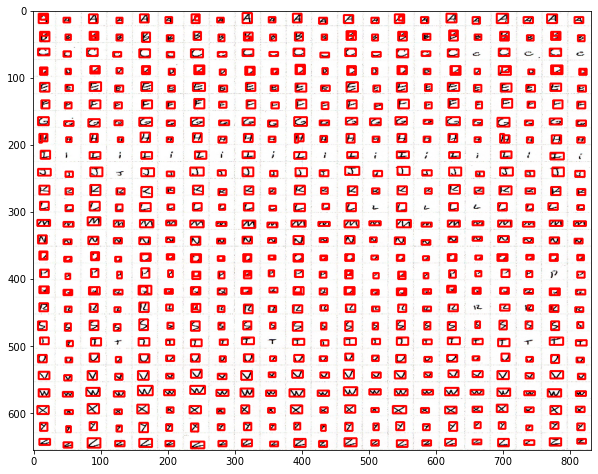

In [16]:
plt.figure(figsize=(10,10))
showfig(img3,"gray") 

In [ ]:
samples = np.loadtxt('train_samples.data',np.float32)
responses = np.loadtxt('train_responses.data',np.float32)
responses = responses.reshape((responses.size,1))

In [17]:
print(samples.shape)

(621, 100)


In [18]:
model = cv2.ml.KNearest_create()
model.train(samples, cv2.ml.ROW_SAMPLE, responses)

True

A imagem texto1.jpg tem é de uma folha de caderno e as linhas atrapalham demais, então tive que fazer outra em sulfite.

(612, 525)


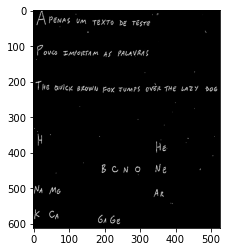

In [19]:
img = cv2.imread('texto2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,ksize=(5,5),sigmaX=0)
th = cv2.adaptiveThreshold(blur,255,1,1,11,2)
out = np.zeros(img.shape,np.float32)

img2 = cv2.resize(img, (int(th.shape[0]/2), int(th.shape[1]/2)))
th2 = cv2.resize(th, (int(th.shape[0]/2), int(th.shape[1]/2)))

showfig(th2,"gray") 
print(th2.shape)

**Classificando os caracteres da imagem de teste**

In [20]:
test_samples =  np.empty((0,100),np.float32)
test_responses = []
img3 = img2.copy()

In [21]:
contours,hierarchy = cv2.findContours(th2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

test_samples =  np.empty((0,100),np.float32)
test_responses = []
img3 = img2.copy()

for cnt in contours:
    if cv2.contourArea(cnt)>15:
        [x,y,w,h] = cv2.boundingRect(cnt)

        if  h>1 or w>1:
            
            cv2.rectangle(img3,(x,y),(x+w,y+h),(0,0,255),2)
            roi = th2[y:y+h,x:x+w]
            roismall = cv2.resize(roi,(10,10))

            cv2.imshow('train test',img3)
            key = cv2.waitKey()

            if key == 27:  # (esc to quit)
                break
            elif key in keys:
                test_responses.append(key)
                sample = roismall.reshape((1,100))
                roismall = np.float32(roismall)
                test_samples = np.append(test_samples,sample,0)
            cv2.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),2)

print ("test complete")
np.savetxt('test_samples.data',test_samples)
print ("save 1")
np.savetxt('test_responses.data',test_responses)
print ("save 2")
cv2.destroyAllWindows()

test complete
save 1
save 2


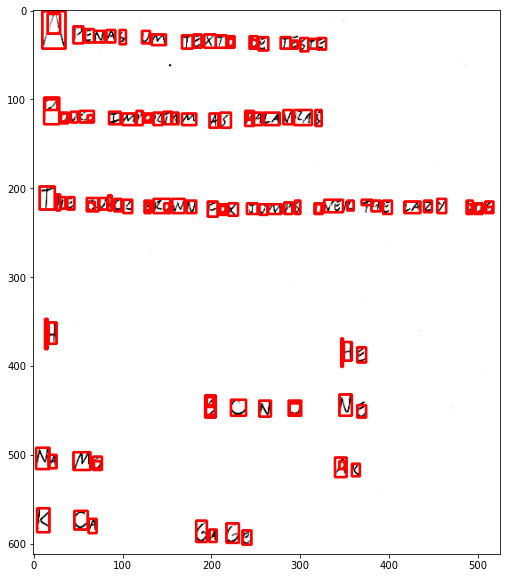

In [22]:
plt.figure(figsize=(10,10))
showfig(img3,"gray") 

In [23]:
print(test_responses)
print(len(test_responses))

[101, 97, 103, 103, 97, 99, 107, 107, 97, 103, 97, 103, 97, 109, 110, 98, 101, 111, 111, 110, 99, 98, 98, 110, 101, 104, 104, 104, 104, 103, 111, 111, 100, 111, 109, 117, 111, 111, 111, 111, 106, 120, 98, 113, 112, 103, 108, 102, 100, 122, 101, 104, 114, 115, 110, 98, 116, 118, 107, 121, 119, 114, 99, 117, 113, 101, 104, 105, 104, 116, 111, 111, 111, 112, 97, 109, 111, 109, 108, 97, 115, 97, 114, 111, 116, 105, 117, 112, 112, 99, 115, 114, 118, 112, 112, 101, 100, 112, 116, 101, 115, 116, 101, 100, 111, 116, 116, 120, 101, 109, 117, 110, 115, 97, 101, 112, 97, 97]
118


**Teste**

In [24]:
contours,hierarchy = cv2.findContours(th2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#string = ''
test_class = []

for cnt in contours:
    if cv2.contourArea(cnt)>15:
        [x,y,w,h] = cv2.boundingRect(cnt)
        if  h>1 or w>1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            roi = th2[y:y+h,x:x+w]
            roismall = cv2.resize(roi,(10,10))
            roismall = roismall.reshape((1,100))
            roismall = np.float32(roismall)

            retval, results, neigh_resp, dists = model.findNearest(roismall,k=1)
            
            
            string = dict_ntol[int(results[0][0])]
            test_class.append(string)
            cv2.putText(out,string,(x,y+h),0,1,(0,255,0))

**Visualizando a imagem gerada pela classificação do KNN**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


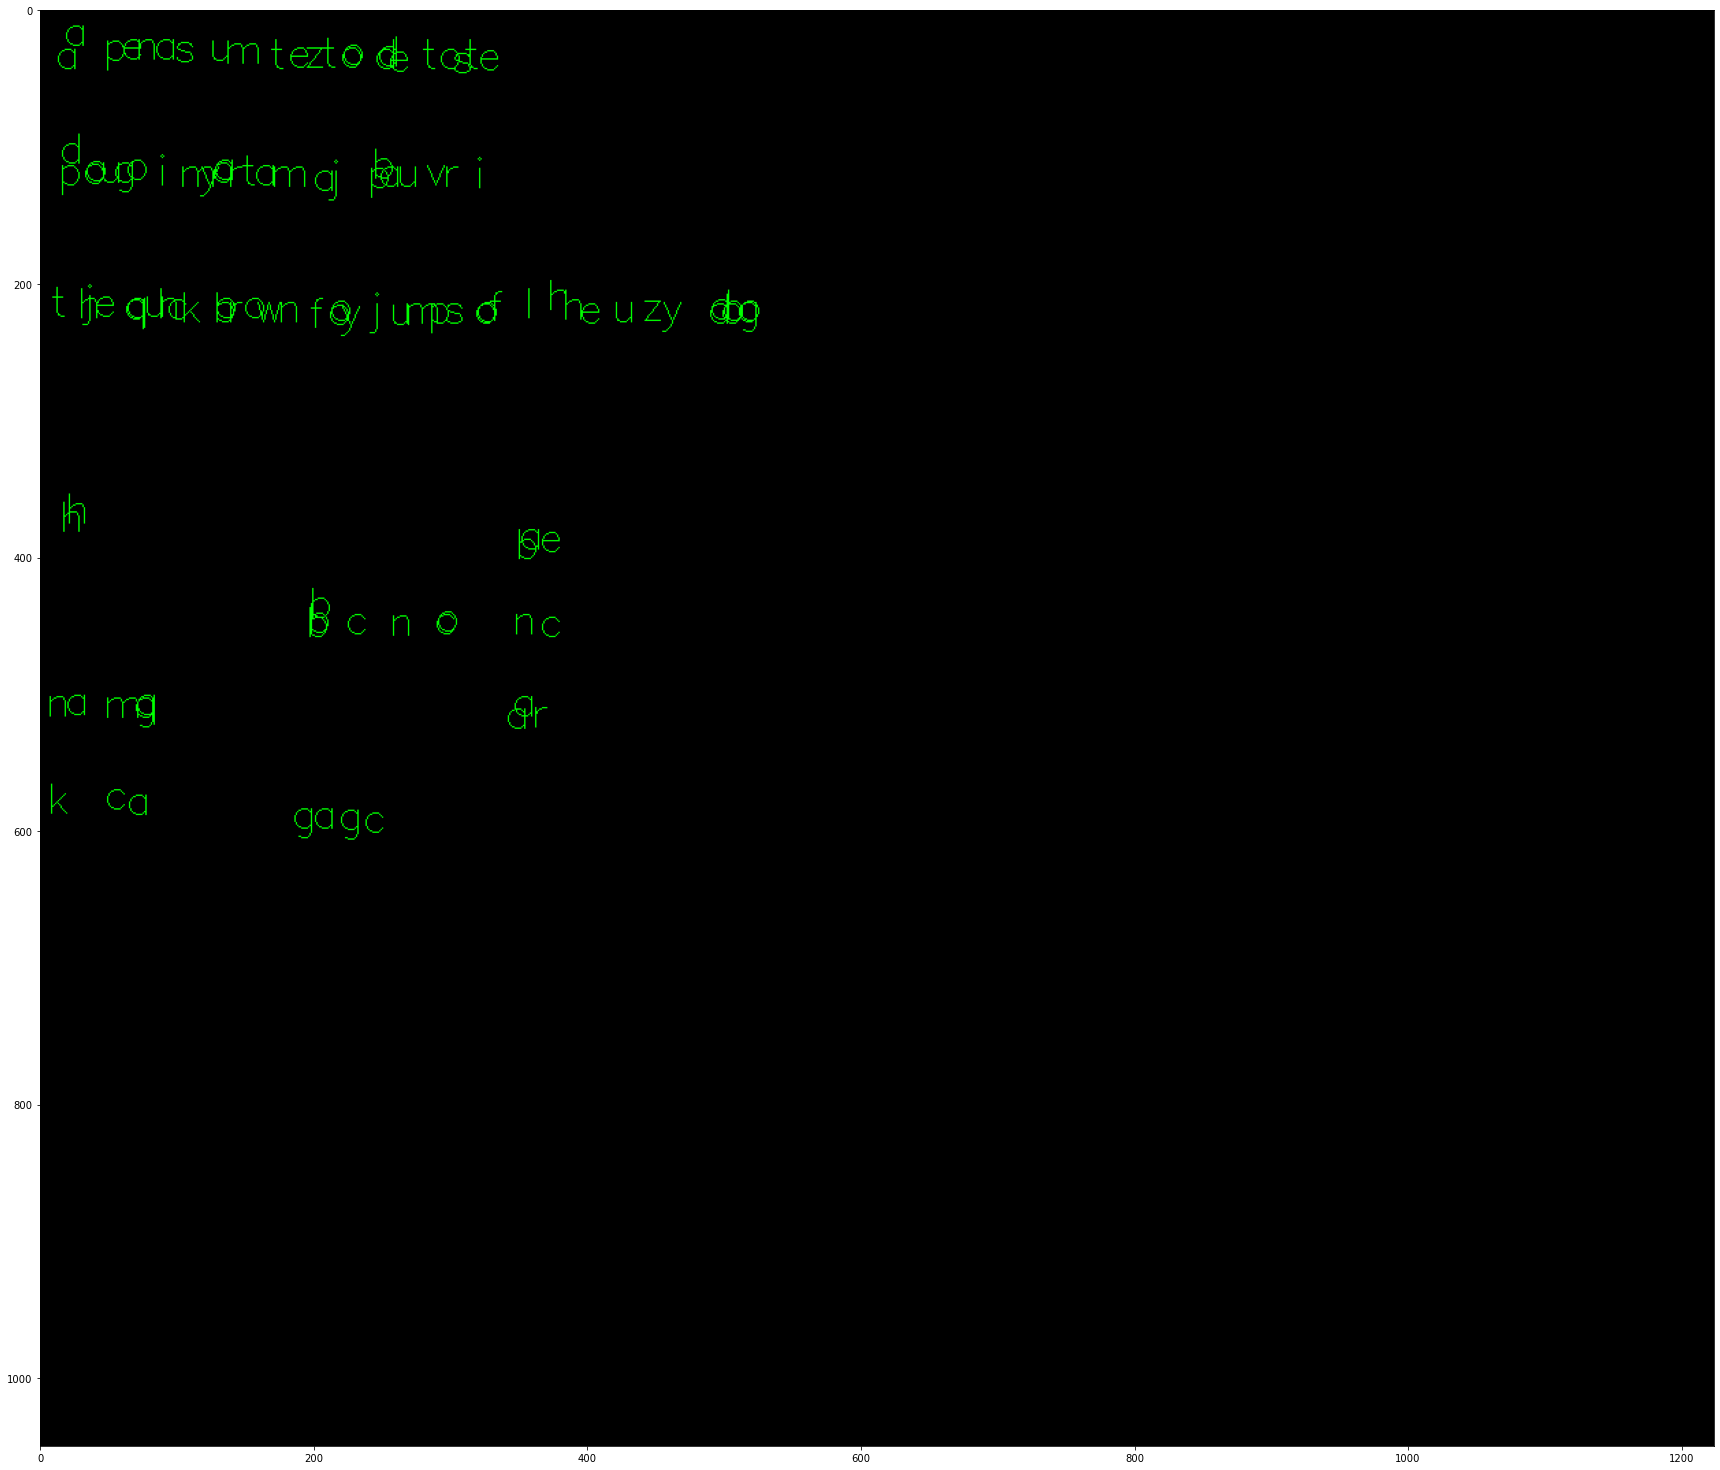

In [25]:
plt.figure(figsize=(30,30))
showfig(out,"gray")

In [26]:
# Classificados pelo KNN
print(test_class)
print(len(test_class))

train_class = []
for i in range (len(test_responses)):
    train_class.append(dict_ntol[test_responses[i]])

# Classificados manualmente
print(train_class)
print(len(train_class))

['c', 'a', 'g', 'g', 'a', 'c', 'k', 'r', 'a', 'q', 'a', 'g', 'a', 'm', 'n', 'b', 'c', 'o', 'c', 'n', 'c', 'b', 'b', 'n', 'e', 'a', 'b', 'h', 'h', 'o', 'o', 'o', 'd', 'o', 'm', 'u', 'o', 'o', 'o', 'o', 'j', 'y', 'o', 'q', 'p', 'g', 'u', 'f', 'd', 'z', 'e', 'h', 'l', 's', 'n', 'b', 'h', 'f', 'k', 'y', 'w', 'r', 'c', 'u', 'q', 'e', 'j', 'h', 'h', 't', 'o', 'a', 'o', 'b', 'a', 'm', 'o', 'm', 'u', 'a', 'j', 'a', 'r', 'o', 't', 'i', 'u', 'p', 'y', 'g', 'i', 'r', 'v', 'd', 'p', 'o', 'd', 'o', 't', 'e', 's', 't', 'e', 'd', 'o', 't', 't', 'z', 'e', 'm', 'u', 'n', 's', 'a', 'e', 'p', 'a', 'a']
118
['e', 'a', 'g', 'g', 'a', 'c', 'k', 'k', 'a', 'g', 'a', 'g', 'a', 'm', 'n', 'b', 'e', 'o', 'o', 'n', 'c', 'b', 'b', 'n', 'e', 'h', 'h', 'h', 'h', 'g', 'o', 'o', 'd', 'o', 'm', 'u', 'o', 'o', 'o', 'o', 'j', 'x', 'b', 'q', 'p', 'g', 'l', 'f', 'd', 'z', 'e', 'h', 'r', 's', 'n', 'b', 't', 'v', 'k', 'y', 'w', 'r', 'c', 'u', 'q', 'e', 'h', 'i', 'h', 't', 'o', 'o', 'o', 'p', 'a', 'm', 'o', 'm', 'l', 'a', 's',

**Acurácia do modelo**

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(train_class, test_class)

0.7711864406779662

Diferenciando maiúsculas e minúsculas a acurácia foi 0.4152542372881356

Usando só minúsculas subiu para 0.7966101694915254

**Referências:**

http://stackoverflow.com/questions/9413216/simple-digit-recognition-ocr-in-opencv-python